In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = pd.read_csv('../data/MachineLearningRating_v3.txt', sep="|")
cols = df.columns

# Basic Explanatory analysis to understand the data

In [3]:
df.shape

(1000098, 52)

In [25]:
df.dropna(inplace=True)

In [4]:
features = ['TotalPremium','TotalClaims', 'SumInsured']
df[features].describe()

,TotalPremium,TotalClaims,SumInsured
count,1.000098e+06,1.000098e+06,1.000098e+06
mean,6.190550e+01,6.486119e+01,6.041727e+05
std,2.302845e+02,2.384075e+03,1.508332e+06
min,-7.825768e+02,-1.200241e+04,1.000000e-02
25%,0.000000e+00,0.000000e+00,5.000000e+03
50%,2.178333e+00,0.000000e+00,7.500000e+03
75%,2.192982e+01,0.000000e+00,2.500000e+05
max,6.528260e+04,3.930921e+05,1.263620e+07


In [5]:
insurance_sections = df['Section'].unique()

<AxesSubplot:xlabel='CoverType'>

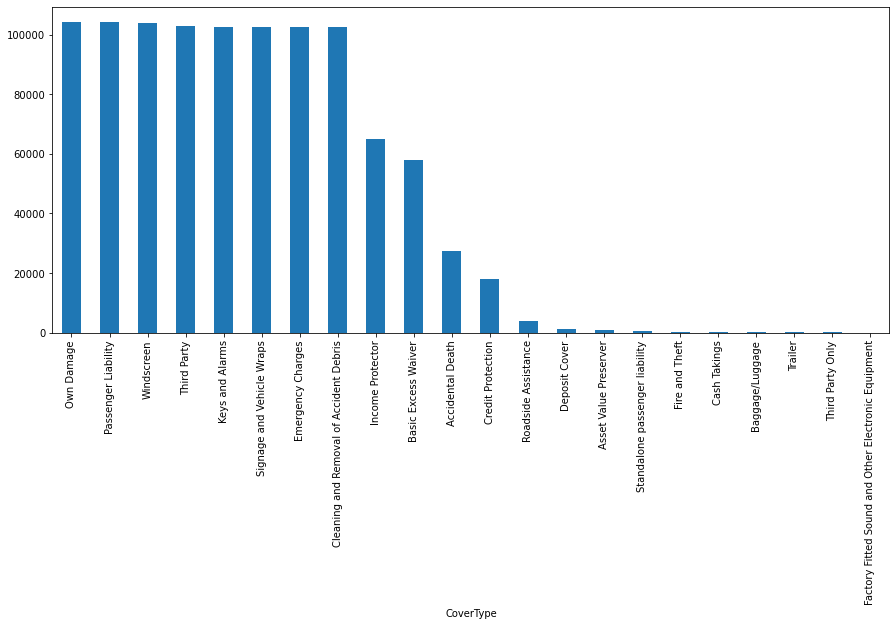

In [6]:
# catagorical analysis
df['CoverType'].value_counts().plot(kind='bar', figsize=(15,6))

# Univariate Analysis

In [7]:
# sns.pairplot(df, hue="TotalClaims", size=5)
df['VehicleIntroDate'] = pd.to_datetime(df['VehicleIntroDate'])
# pd.to_datetime(df['RegistrationYear'])


In [8]:
# univariate analysis based on catagory

# own damage and passanger liability
df_own_damage = df.loc[df['CoverType'] == 'Own Damage']
df_passenger_liability = df.loc[df['CoverType'] == 'Passenger Liability']

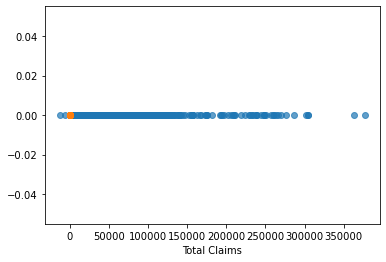

In [9]:
plt.plot(np.array(df_own_damage['TotalClaims']), np.zeros_like(np.array(df_own_damage['TotalClaims'])), 'o', alpha=0.7)
plt.plot(np.array(df_passenger_liability['TotalClaims']), np.zeros_like(np.array(df_passenger_liability['TotalClaims'])), 'o', alpha=0.7)
plt.xlabel('Total Claims')
plt.show()

## Bivariate Analysis

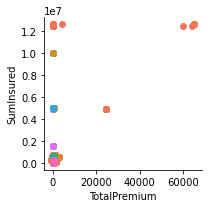

In [10]:

sns.FacetGrid(df, hue='CoverType').map(plt.scatter, 'TotalPremium', 'SumInsured')
plt.show()

# Multivariate Analysis

In [11]:

import seaborn as sns

In [12]:
# sns.pairplot(df, hue="TotalPremium", size=5)
df.set_index('VehicleIntroDate', inplace=True)


In [13]:
df['TotalClaims'].agg(['min', 'max'])

min    -12002.412281
max    393092.105263
Name: TotalClaims, dtype: float64

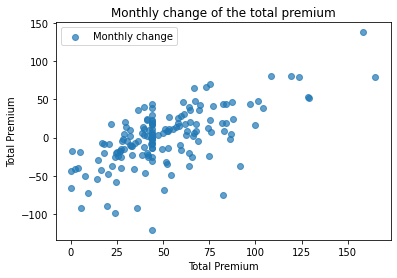

In [14]:

df_features = df[features]

#1 month price change
df_features = df_features[['TotalPremium','TotalClaims', 'SumInsured']].resample('M').mean()
df_features.dropna(inplace=True)
df_features['1m_diff_total_premium'] = df_features['TotalPremium'] - df_features['TotalPremium'].shift(1)
plt.scatter(df_features['TotalPremium'], df_features['1m_diff_total_premium'], label='Monthly change', alpha=0.7)
plt.title('Monthly change of the total premium')
plt.xlabel('Total Premium')
plt.ylabel('Total Premium')
plt.legend()
plt.show()

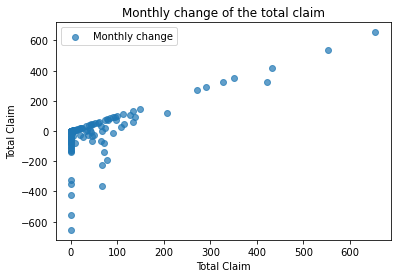

In [15]:
#1 month price change
df_features = df_features.resample('M').mean()
df_features.dropna(inplace=True)
df_features['1m_diff_total_claim'] = df_features['TotalClaims'] - df_features['TotalClaims'].shift(1)
plt.scatter(df_features['TotalClaims'], df_features['1m_diff_total_claim'], label='Monthly change', alpha=0.7)
plt.title('Monthly change of the total claim')
plt.xlabel('Total Claim')
plt.ylabel('Total Claim')
plt.legend()
plt.show()

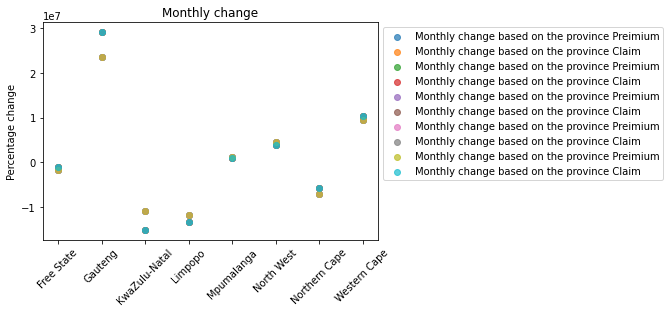

In [16]:
# Change based on province

grouped_data = df.groupby('Province')[features].sum()

grouped_data['1m_diff_total_claim'] = grouped_data['TotalClaims'] - grouped_data['TotalClaims'].shift(1)

grouped_data['1m_diff_total_premium'] = grouped_data['TotalPremium'] - grouped_data['TotalPremium'].shift(1)
grouped_data.dropna(inplace=True)
#names of the province 
for province, group in grouped_data.items():
    plt.scatter(grouped_data.index, grouped_data['1m_diff_total_premium'], label='Monthly change based on the province Preimium', alpha=0.7)
    plt.scatter(grouped_data.index, grouped_data['1m_diff_total_claim'], label='Monthly change based on the province Claim', alpha=0.7)

plt.title('Monthly change')
plt.ylabel('Percentage change')
plt.xticks(rotation=45)
plt.legend()
plt.legend(loc='upper left', bbox_to_anchor=(1, 1)) 
plt.show()

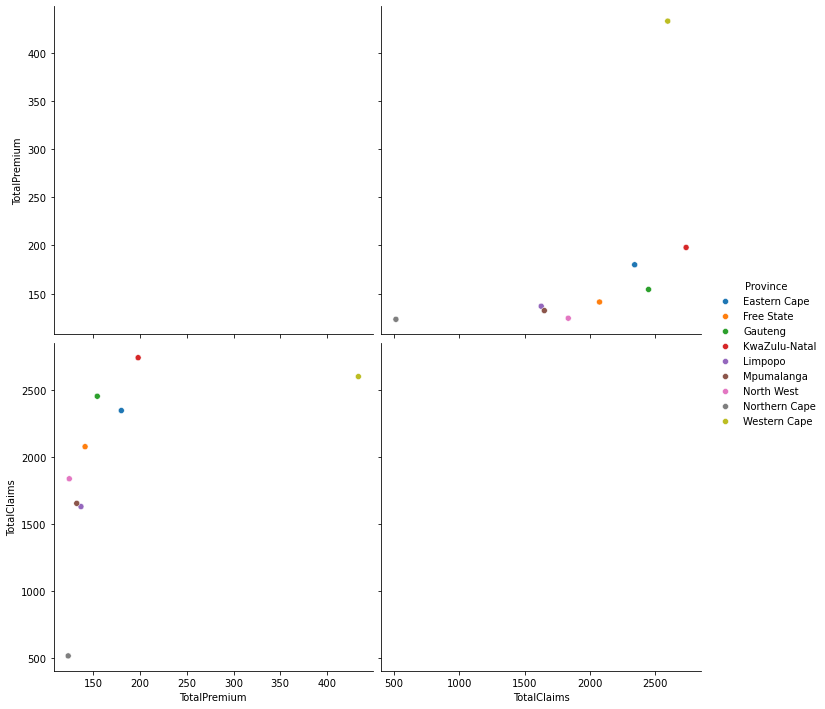

In [17]:
# Since the features are to large taking 2 features

df_f4 = df.groupby('Province')[['TotalClaims', 'TotalPremium']].std().reset_index()

sns.pairplot(df_f4, vars=['TotalPremium', 'TotalClaims'], hue='Province', height=5)

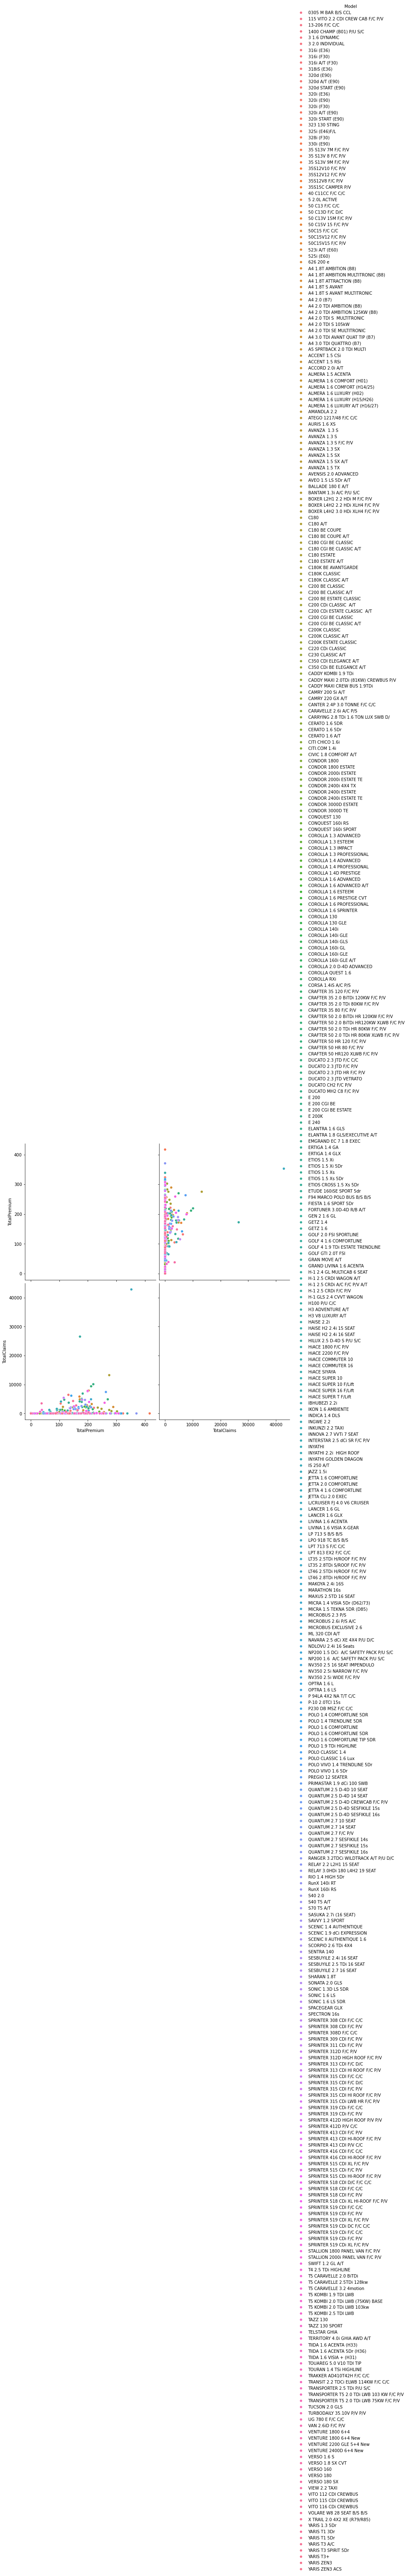

In [18]:
# Since the features are to large taking 2 features based on country
df_f4 = df.groupby('Model')[['TotalClaims', 'TotalPremium']].std().reset_index()

sns.pairplot(df_f4, vars=['TotalPremium', 'TotalClaims'], hue='Model', height=5)

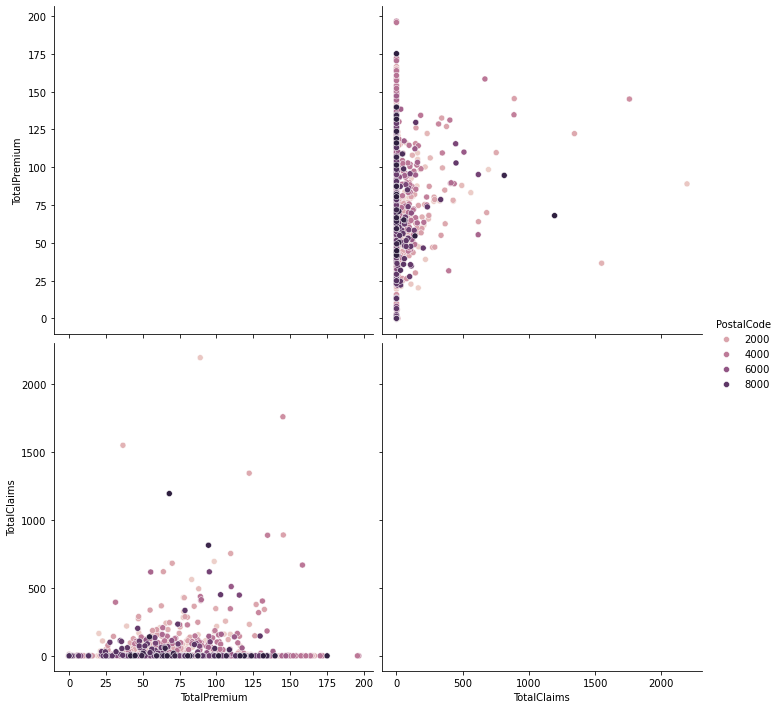

In [19]:
# Since the features are to large taking 2 features based on country
df_f4 = df.groupby('PostalCode')[['TotalClaims', 'TotalPremium']].mean().reset_index()

sns.pairplot(df_f4, vars=['TotalPremium', 'TotalClaims'], hue='PostalCode', height=5)

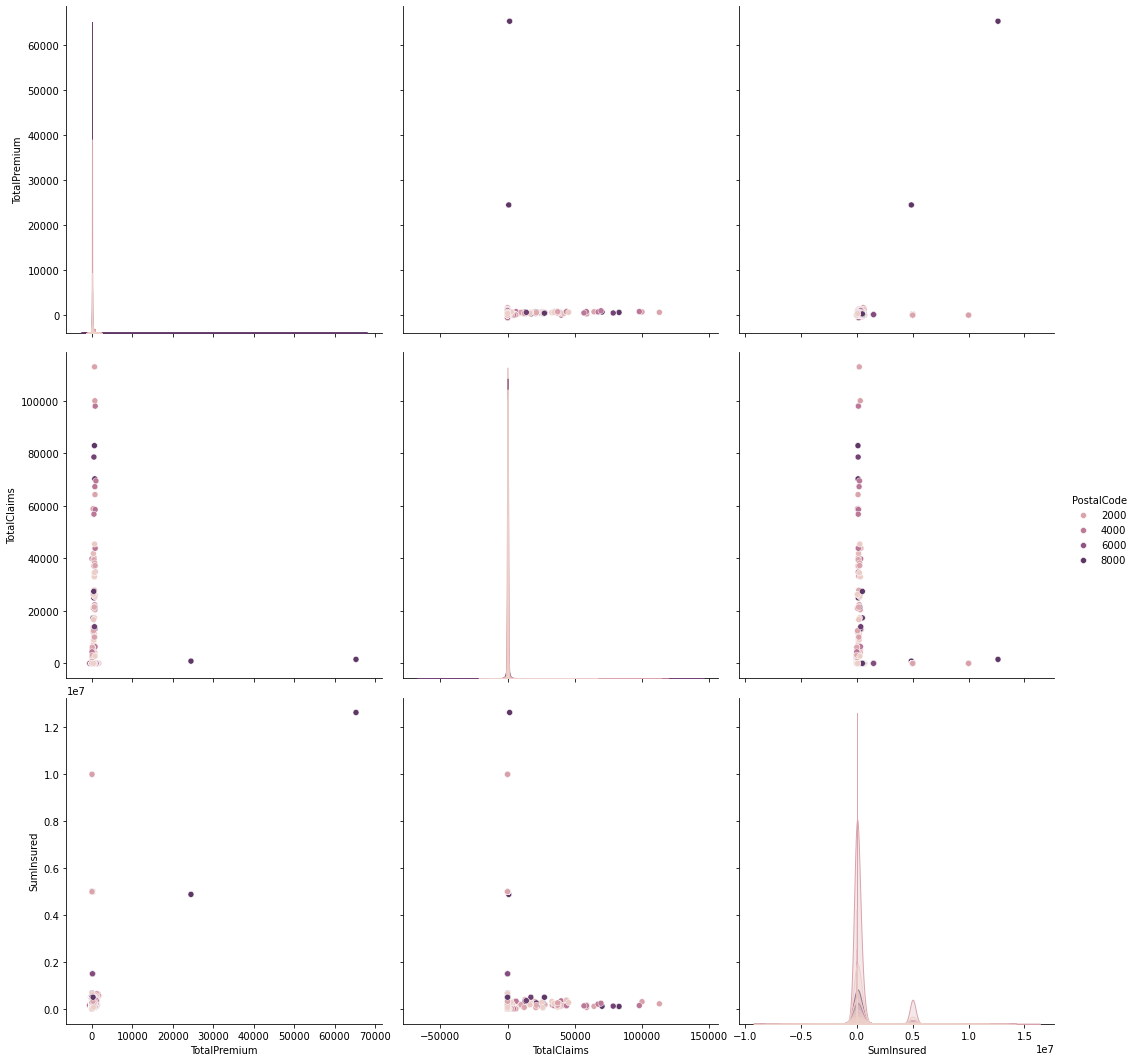

In [24]:
# Since the features are to large taking 2 features based on country
df_f4 = df[['TotalClaims', 'TotalPremium', 'PostalCode','SumInsured','Model', 'CoverType']].sample(40000)

sns.pairplot(df_f4, vars=['TotalPremium', 'TotalClaims', 'SumInsured'], hue='PostalCode', height=5)

###  Multivariant analysis based on Cover Type

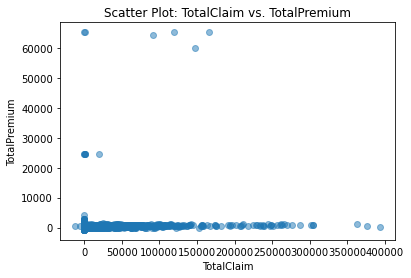

In [21]:
# Create a scatter plot
plt.scatter(df['TotalClaims'], df['TotalPremium'], alpha=0.5)
plt.xlabel('TotalClaim')
plt.ylabel('TotalPremium')
plt.title('Scatter Plot: TotalClaim vs. TotalPremium')

# Show the plot
plt.show()

In [22]:
sample = df.sample(45000)

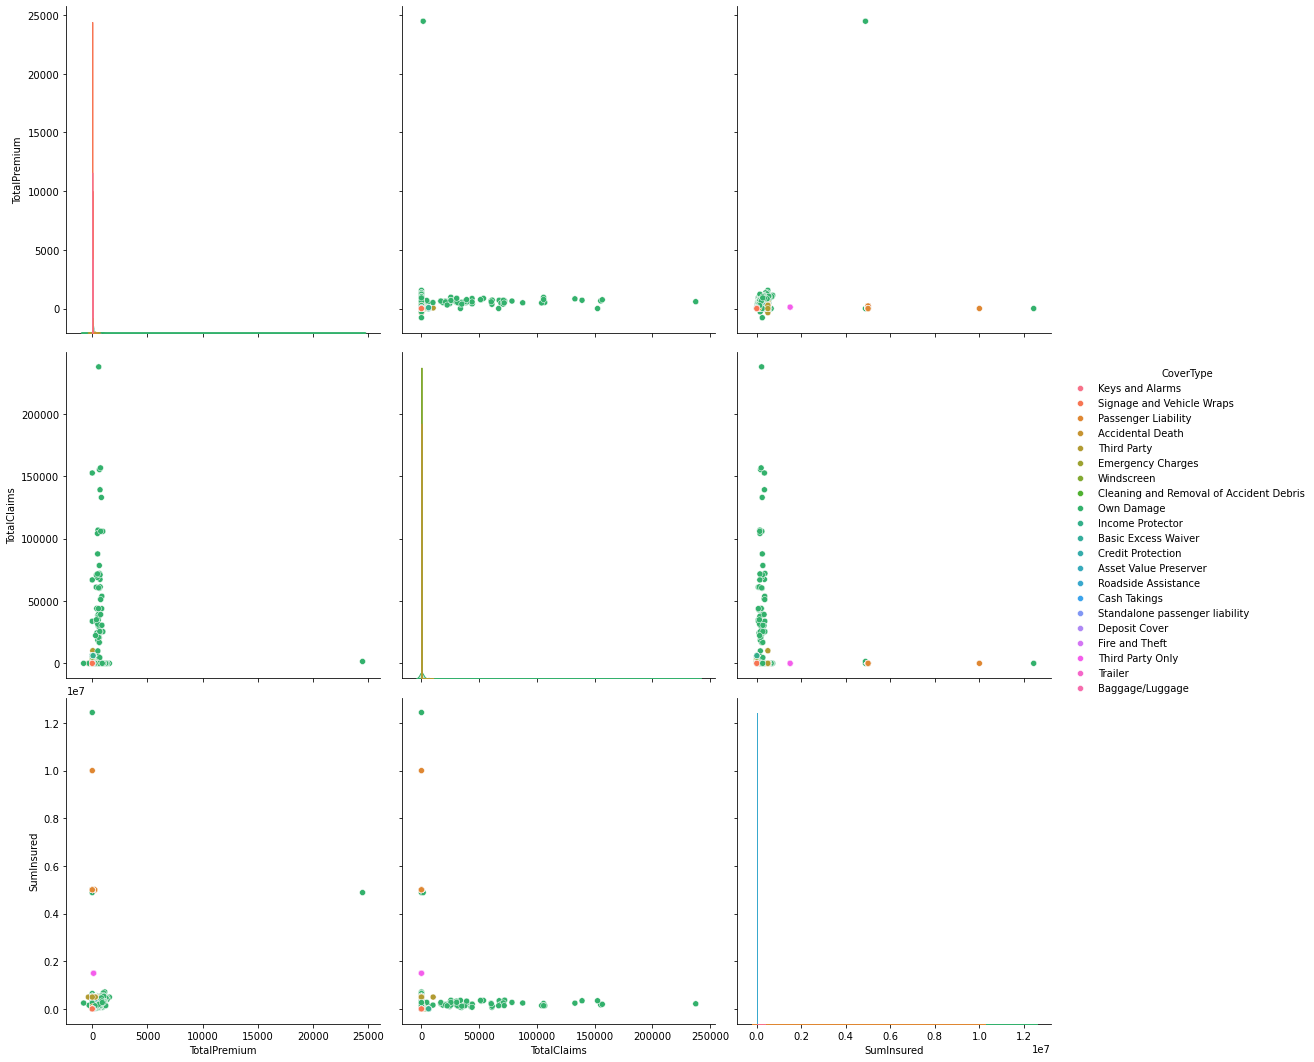

In [23]:
cov_df = features + ['CoverType']
sns.pairplot(sample[cov_df], hue='CoverType', size=5)